<a href="https://colab.research.google.com/github/Skytronn/Titanic/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

**Importando os Dados**

In [ ]:
#configuração do notebook para acesso aos datasets
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/Titanic/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
treino = pd.read_csv(path + '/train.csv')
teste = pd.read_csv(path + '/test.csv')

In [ ]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**Limpando os Dados**

ColPclass

In [ ]:
treino.Pclass.isnull().sum()

0

ColName

In [ ]:
df = treino.copy()
df.Name = df.Name.str.split(' ').apply(lambda x:x[1])
titles = ['Dr.', 'Rev.', 'y', 'Impe,',
      'Planke,', 'Mlle.', 'Major.', 'Col.', 'Gordon,', 'Don.', 'Walle,',
      'Melkebeke,', 'Pelsmaeker,', 'Messemaeker,', 'Capt.', 'Jonkheer.',
      'the', 'Mme.', 'Mulder,', 'Steen,', 'Carlo,', 'der', 'Shawah,',
      'Billiard,', 'Cruyssen,', 'Ms.', 'Velde,' , 'Palmquist,', 'Brito,'  , 'Khalil,'  ]
df.Name.replace(titles, 'others', inplace=True)
df.Name.value_counts()

Mr.        502
Miss.      179
Mrs.       121
others      49
Master.     40
Name: Name, dtype: int64

In [ ]:
sns.set_palette("Blues_r")
sns.set_style("darkgrid")

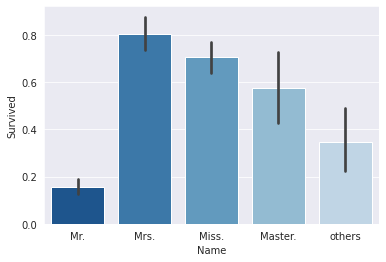

In [ ]:
sns.barplot(data=df, x = 'Name', y = 'Survived')

In [ ]:
def limpando_nome(df):
  df.Name = df.Name.str.split(' ').apply(lambda x:x[1])
  titles = ['Dr.', 'Rev.', 'y', 'Impe,',
        'Planke,', 'Mlle.', 'Major.', 'Col.', 'Gordon,', 'Don.', 'Walle,',
        'Melkebeke,', 'Pelsmaeker,', 'Messemaeker,', 'Capt.', 'Jonkheer.',
        'the', 'Mme.', 'Mulder,', 'Steen,', 'Carlo,', 'der', 'Shawah,',
        'Billiard,', 'Cruyssen,', 'Ms.', 'Velde,' , 'Palmquist,', 'Brito,'  , 'Khalil,'  ]
  df.Name.replace(titles, 'others', inplace=True)
  return df

df = treino.copy()
limpando_nome(df).Name.value_counts()

Mr.        502
Miss.      179
Mrs.       121
others      49
Master.     40
Name: Name, dtype: int64

ColSex

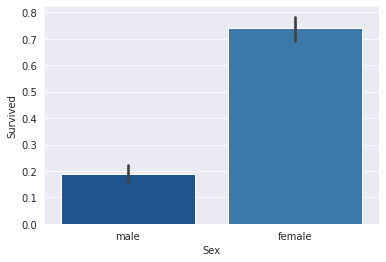

In [ ]:
df = treino.copy()
df.Sex.value_counts()

sns.barplot(data=df, x = 'Sex', y = 'Survived')

ColAge

In [ ]:
df = treino.copy()
df.Age = df.Age.fillna(df.Age.median())
df.Age = pd.cut(df.Age, 5)
df.Age.value_counts()

(16.336, 32.252]    523
(32.252, 48.168]    188
(0.34, 16.336]      100
(48.168, 64.084]     69
(64.084, 80.0]       11
Name: Age, dtype: int64

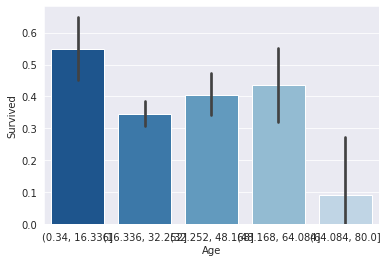

In [ ]:
df = treino.copy()
df.Age = df.Age.fillna(df.Age.median())
df.Age = pd.cut(df.Age, 5)
df.Age.value_counts()

sns.barplot(data=df, x = 'Age', y = 'Survived')

In [ ]:
def limpando_idades(df):
  df.Age = df.Age.fillna(df.Age.median())
  df.Age = pd.cut(df.Age, 5)
  return df


ColSibSp

In [ ]:
df = treino.copy()
df.columns

def limpando_familias(df):
  df['Family'] = df.SibSp + df.Parch
  df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
  return df

Limpando Ticket

In [ ]:
def limpando_ticket(df):
  df.drop('Ticket', axis=1, inplace=True)
  return df 

Limpando Fare

In [ ]:
df = treino.copy()
def limpando_fare(df):
  df.Fare = df.Fare.fillna(df.Fare.median())
  df.Fare = pd.cut(df.Fare , 5)
  return df
 
df = limpando_fare(df)
df.Fare.value_counts()

(-0.512, 102.466]     838
(102.466, 204.932]     33
(204.932, 307.398]     17
(409.863, 512.329]      3
(307.398, 409.863]      0
Name: Fare, dtype: int64

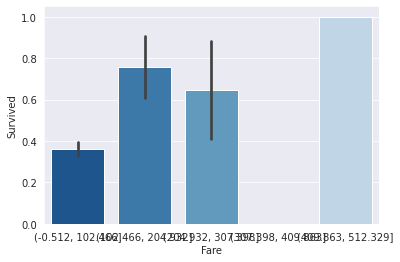

In [ ]:
df = treino.copy()
def fare(df):
  df.Fare = df.Fare.fillna(df.Fare.median())
  df.Fare = pd.cut(df.Fare , 5)
  return df
 
df = limpando_fare(df)
df.Fare.value_counts()

sns.barplot(data=df, x = 'Fare', y = 'Survived')

In [ ]:
def limpando_fare(df):
  df.Fare = df.Fare.fillna(df.Fare.median())
  df.Fare = pd.cut(df.Fare , 5)
  return df

Limpando Cabin

In [ ]:
df = treino.copy()

df.Cabin.fillna('N', inplace=True)
df.Cabin = df.Cabin.apply(lambda x:x[0])
df.Cabin.value_counts()

N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

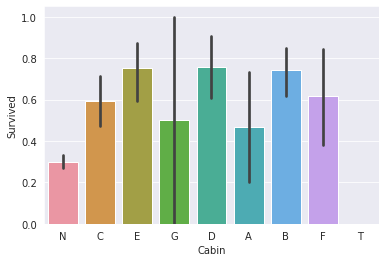

In [ ]:
df = treino.copy()

df.Cabin.fillna('N', inplace=True)
df.Cabin = df.Cabin.apply(lambda x:x[0])
df.Cabin.value_counts()

sns.barplot(data=df, x = 'Cabin', y = 'Survived')

In [ ]:
def limapando_cabine(df):
  df.Cabin.fillna('N', inplace=True)
  df.Cabin = df.Cabin.apply(lambda x:x[0])
  return df

Limpando Embarked

In [ ]:
df = treino.copy()
df.Embarked.fillna('S', inplace=True)
df.Embarked.value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

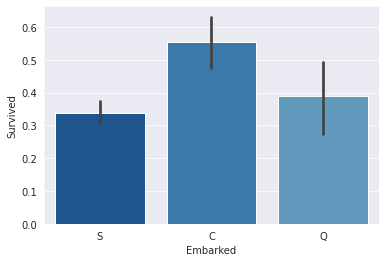

In [ ]:
df = treino.copy()
df.Embarked.fillna('S', inplace=True)
df.Embarked.value_counts()

sns.barplot(data=df, x = 'Embarked', y = 'Survived')

In [ ]:
def limpando_embarcou (df):
  df.Embarked.fillna('S', inplace=True)
  return df

In [ ]:
def data_frame_limpo(df):
  df = limpando_nome(df)
  df = limpando_idades(df)
  df = limpando_familias(df)
  df = limpando_ticket(df)
  df = limpando_fare(df)
  df = limapando_cabine(df)
  df = limpando_embarcou(df)
  return df

In [ ]:
df = treino.copy() 
data_frame_limpo(df)

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,1,0,3,Mr.,male,"(16.336, 32.252]","(-0.512, 102.466]",N,S,1
1,2,1,1,Mrs.,female,"(32.252, 48.168]","(-0.512, 102.466]",C,C,1
2,3,1,3,Miss.,female,"(16.336, 32.252]","(-0.512, 102.466]",N,S,0
3,4,1,1,Mrs.,female,"(32.252, 48.168]","(-0.512, 102.466]",C,S,1
4,5,0,3,Mr.,male,"(32.252, 48.168]","(-0.512, 102.466]",N,S,0
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,others,male,"(16.336, 32.252]","(-0.512, 102.466]",N,S,0
887,888,1,1,Miss.,female,"(16.336, 32.252]","(-0.512, 102.466]",B,S,0
888,889,0,3,Miss.,female,"(16.336, 32.252]","(-0.512, 102.466]",N,S,3
889,890,1,1,Mr.,male,"(16.336, 32.252]","(-0.512, 102.466]",C,C,0


**Pré-processamento de dados**

In [ ]:
treino_limpo =  data_frame_limpo(treino)
teste_limpo =  data_frame_limpo(teste)

In [ ]:
treino_limpo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,1,0,3,Mr.,male,"(16.336, 32.252]","(-0.512, 102.466]",N,S,1
1,2,1,1,Mrs.,female,"(32.252, 48.168]","(-0.512, 102.466]",C,C,1
2,3,1,3,Miss.,female,"(16.336, 32.252]","(-0.512, 102.466]",N,S,0
3,4,1,1,Mrs.,female,"(32.252, 48.168]","(-0.512, 102.466]",C,S,1
4,5,0,3,Mr.,male,"(32.252, 48.168]","(-0.512, 102.466]",N,S,0


In [ ]:
teste_limpo.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,892,3,Mr.,male,"(30.502, 45.668]","(-0.512, 102.466]",N,Q,0
1,893,3,Mrs.,female,"(45.668, 60.834]","(-0.512, 102.466]",N,S,1
2,894,2,Mr.,male,"(60.834, 76.0]","(-0.512, 102.466]",N,Q,0
3,895,3,Mr.,male,"(15.336, 30.502]","(-0.512, 102.466]",N,S,0
4,896,3,Mrs.,female,"(15.336, 30.502]","(-0.512, 102.466]",N,S,2


In [ ]:
from sklearn import preprocessing

def lebels_encoded(df_treino, df_teste):
  Features = ['Name', 'Sex', 'Age', 'Fare', 'Cabin', 'Embarked']
  d = pd.concat([df_treino[Features], df_teste[Features]])

  for F in Features:
    le = preprocessing.LabelEncoder()
    le = le.fit(d[F])
    df_treino[F] = le.transform(df_treino[F])
    df_teste[F] = le.transform(df_teste[F])
  return df_treino, df_teste

In [ ]:
treino, teste = lebels_encoded(treino_limpo, teste_limpo)

In [ ]:
treino.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,1,0,3,2,1,3,0,7,2,1
1,2,1,1,3,0,5,0,2,0,1
2,3,1,3,1,0,3,0,7,2,0
3,4,1,1,3,0,5,0,2,2,1
4,5,0,3,2,1,5,0,7,2,0


In [ ]:
teste.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,892,3,2,1,4,0,7,1,0
1,893,3,3,0,6,0,7,2,1
2,894,2,2,1,8,0,7,1,0
3,895,3,2,1,2,0,7,2,0
4,896,3,3,0,2,0,7,2,2


**Machine Learning - Model**

In [ ]:
X = treino.drop(['PassengerId','Survived'], axis=1)
Y = treino.Survived

In [ ]:
X.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,3,2,1,3,0,7,2,1
1,1,3,0,5,0,2,0,1
2,3,1,0,3,0,7,2,0
3,1,3,0,5,0,2,2,1
4,3,2,1,5,0,7,2,0


In [ ]:
teste_ml = teste.drop('PassengerId', axis=1)

In [ ]:
teste_ml.head()

,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family
0,3,2,1,4,0,7,1,0
1,3,3,0,6,0,7,2,1
2,2,2,1,8,0,7,1,0
3,3,2,1,2,0,7,2,0
4,3,3,0,2,0,7,2,2


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_treino, Y_treino)
rf.score(X_treino, Y_treino)

0.901685393258427

In [ ]:
rf.fit(X,Y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y = rf.predict(teste_ml)

In [ ]:
teste['Survived'] = y 
teste.head()

,PassengerId,Pclass,Name,Sex,Age,Fare,Cabin,Embarked,Family,Survived
0,892,3,2,1,4,0,7,1,0,0
1,893,3,3,0,6,0,7,2,1,0
2,894,2,2,1,8,0,7,1,0,0
3,895,3,2,1,2,0,7,2,0,0
4,896,3,3,0,2,0,7,2,2,1


In [ ]:
df = teste[['PassengerId', 'Survived']]
df.head()
df.to_csv('Titanic.csv', index=False)